## Implementing of the Stochastic Gradient Descent Regressor for One Feature

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image

In [2]:
data=make_regression(n_samples=100,n_features=1)

In [3]:
X=data[0]
y=data[1]

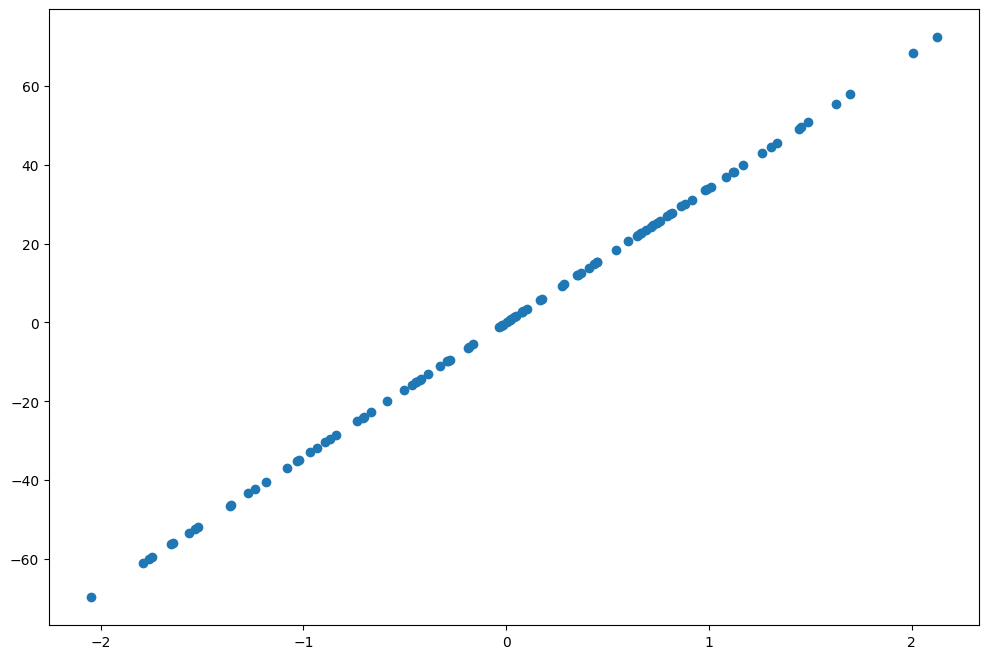

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X,y)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

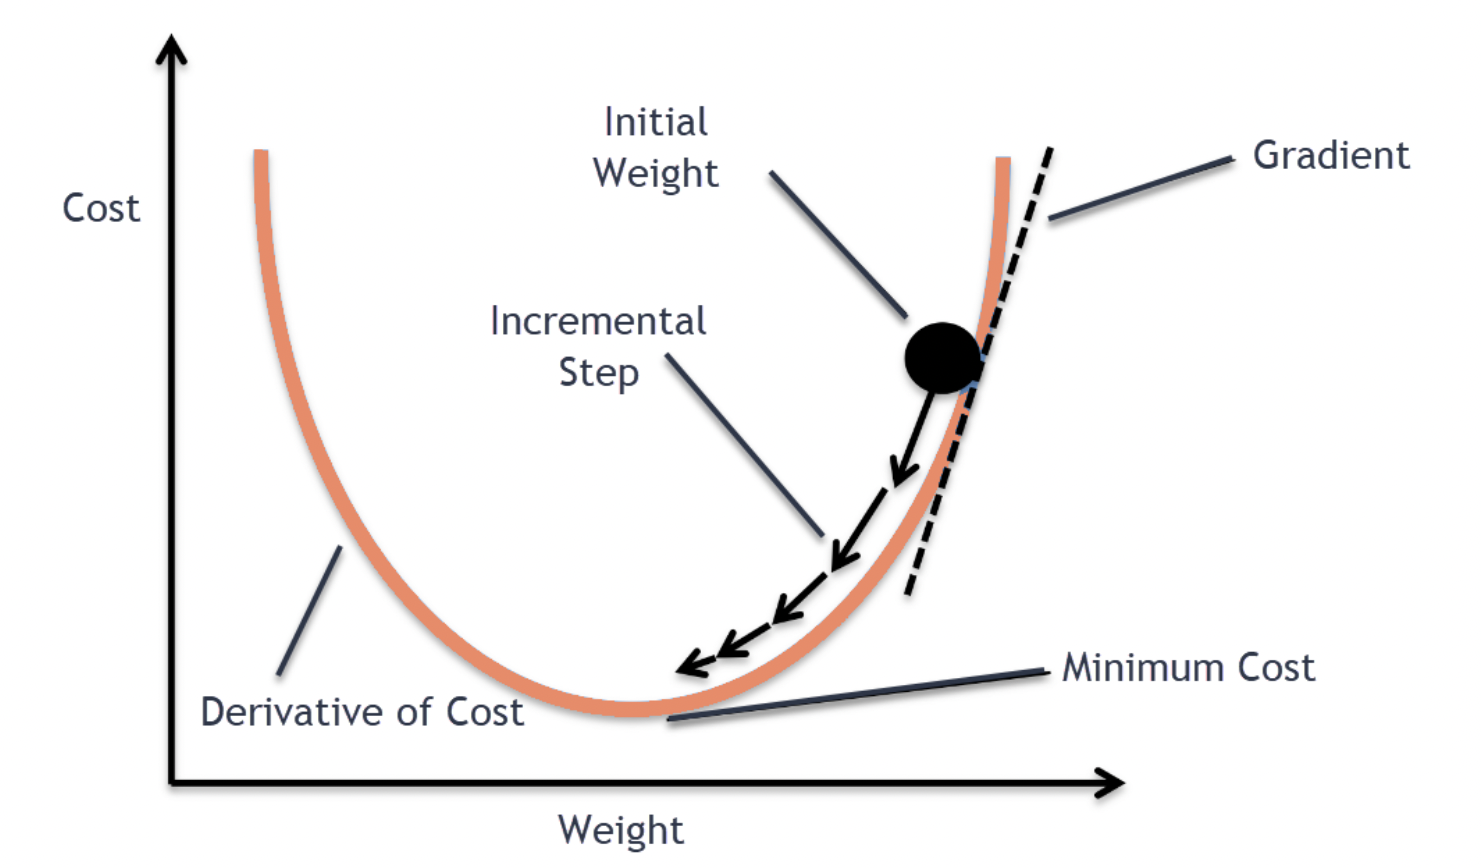

In [6]:
Image.open('Figures/gradientdescent.png')

***Gradient of the cost function while Cost function is mean squared error***

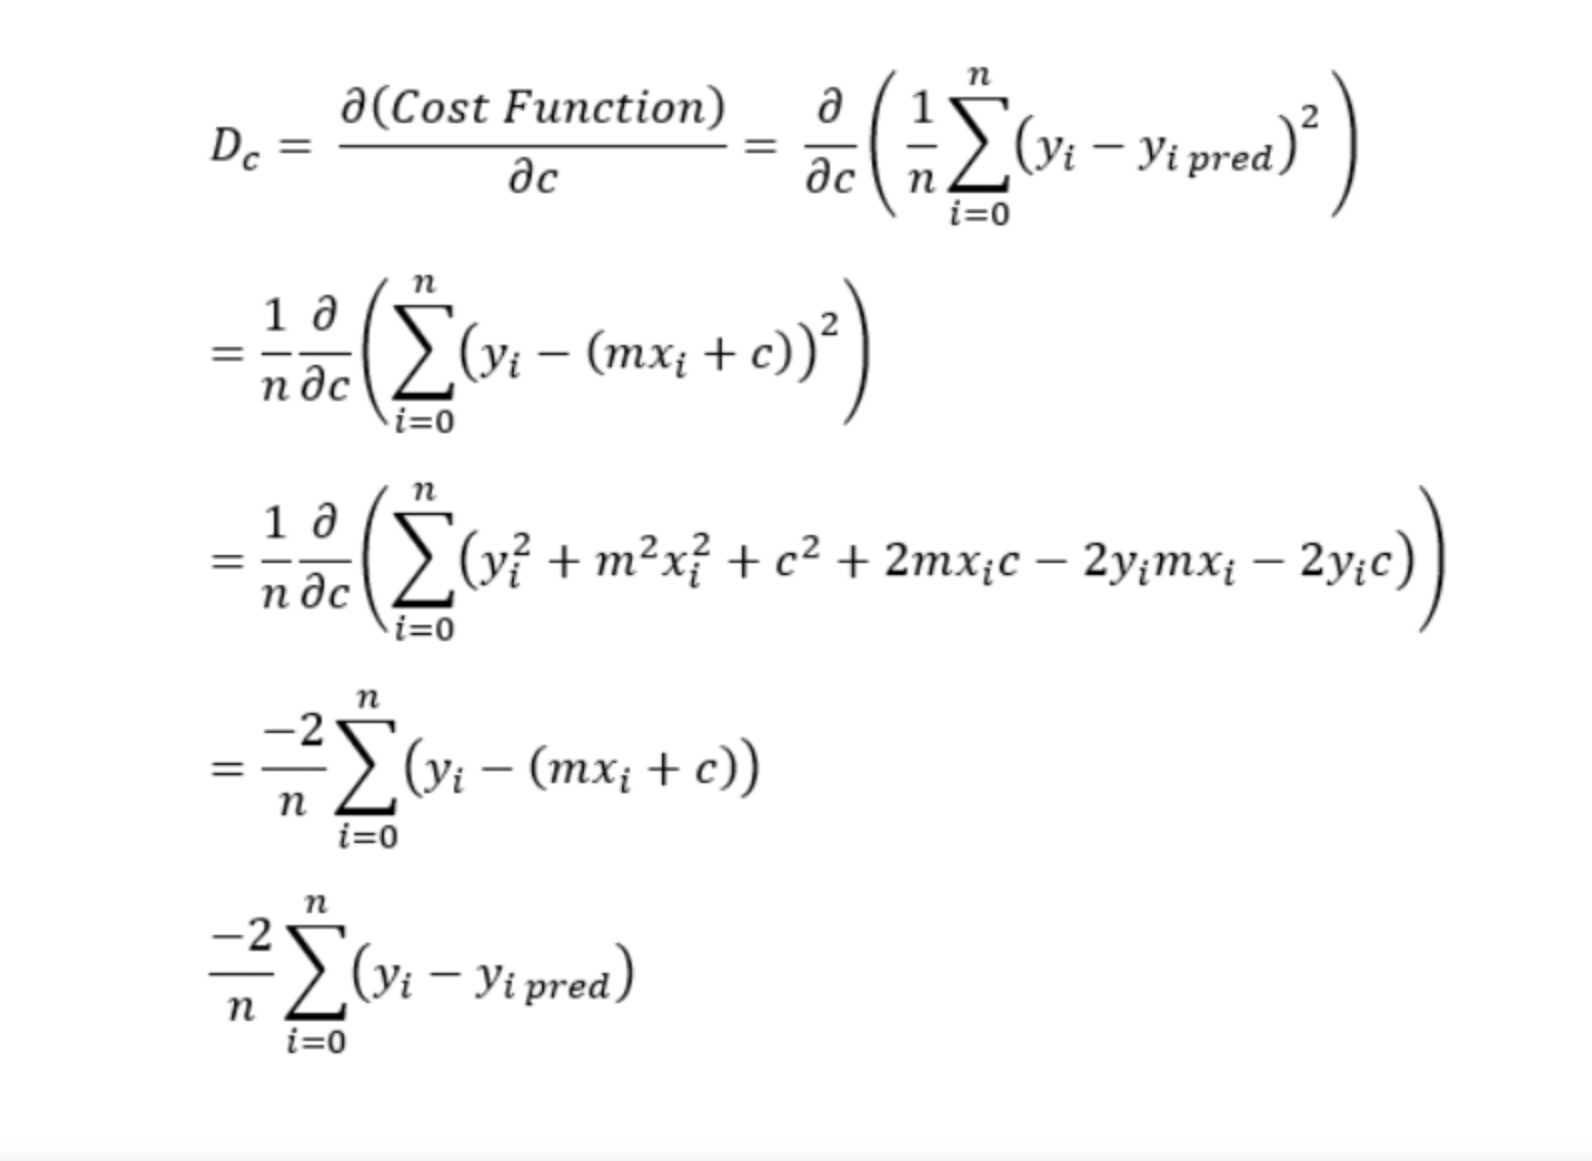

In [7]:
Image.open('Figures/beta0.png')

Partial differential with respect to the **intercept** .

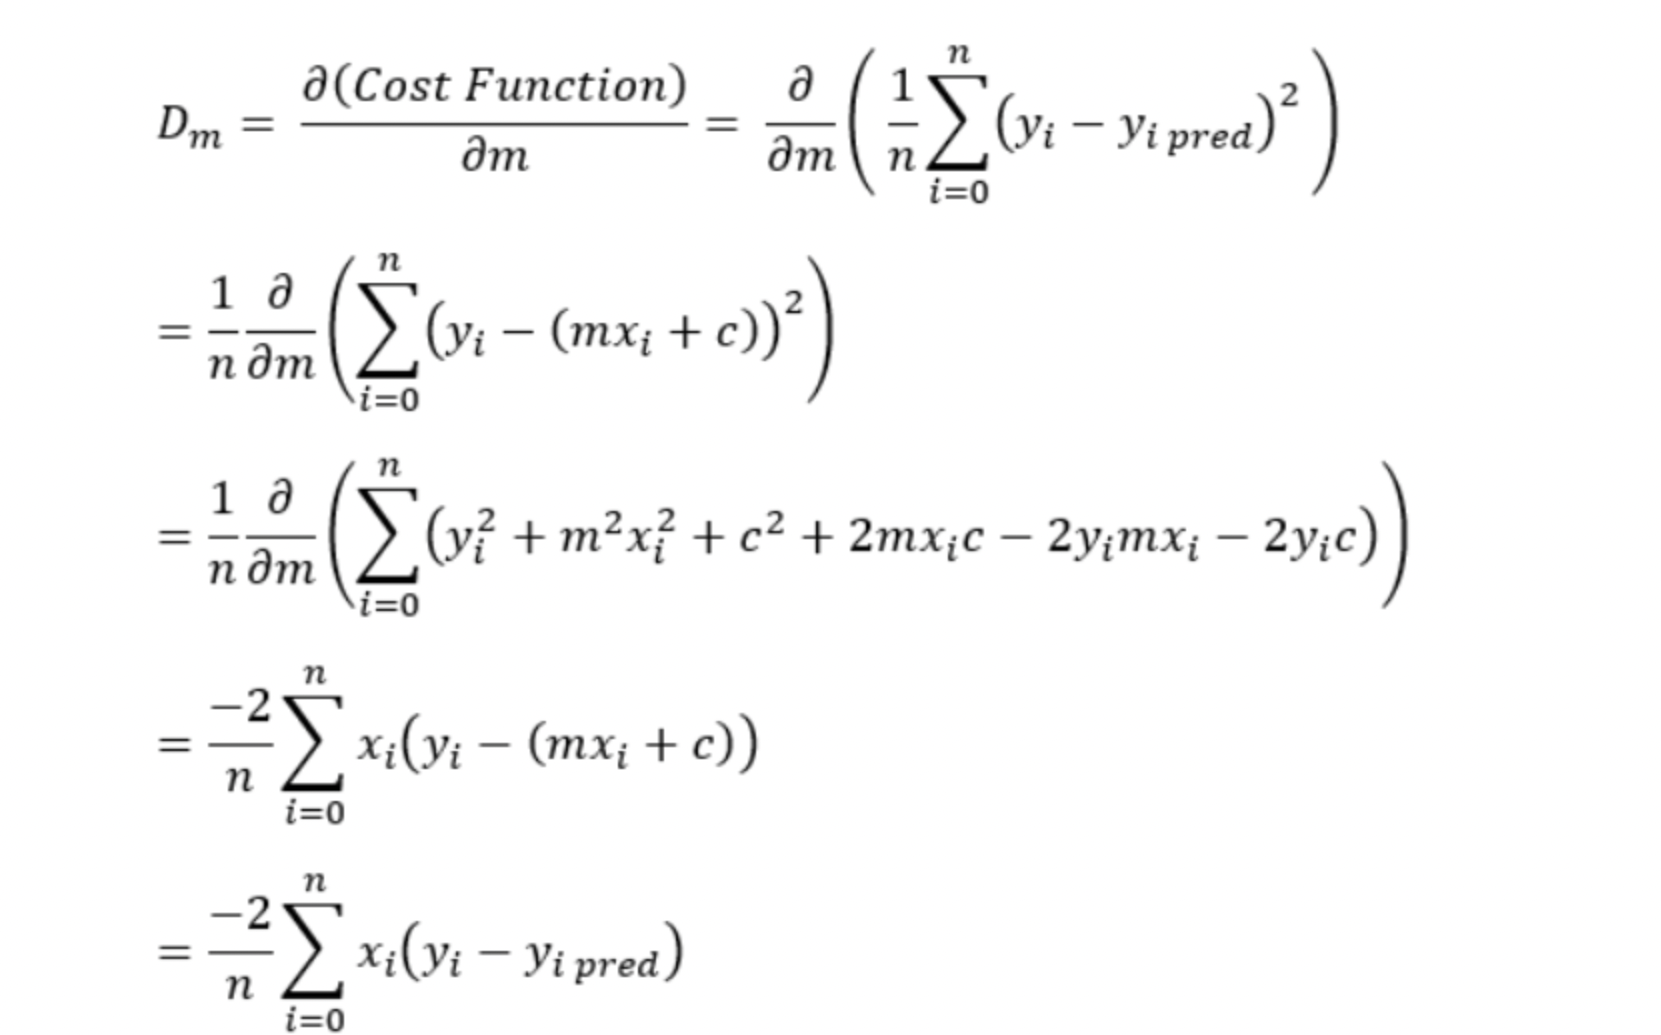

In [8]:
Image.open('Figures/beta1.png')

Partial differential with respect to the **slope** .

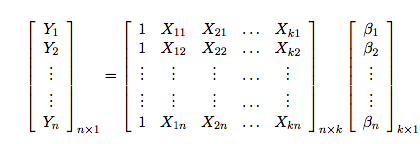

In [9]:
Image.open('Figures/ols_matrix.png')

Vandermonde matrix

#### Description of the Stochastic Gradient Descent Regressor

* **#1** Vandermonde matrix and weights are created in **initalize_params()**

* **#2** 1st stage **#1** is applied in **stochastic_gradient_descent()** method. 

    The partial differential equations of the cost function, taken according to the intercept and coefficient, are multiplied by the **learning_rate** and subtracted to obtain the **local minimum** point. 
    
    But since there are 2 nested loops, a **stopping criterion** has been added. This criterion is the **2^nth convergence ratio test**.

* **3#** **fit()** method returns **weights**.

* **#4** **predict()** method returns the dot product of the X_test and weights. 

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

In [11]:
class SGDRegressor_mine():
    
    """
    Linear model fitted by minimizing a regularized empirical loss with SGD.

    SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time 
    and the model is updated along the way with a decreasing strength schedule (aka learning rate).
    
    Hypermeters::
    
      max_iter : int, default=1000  
      The maximum number of passes over the training data (aka epochs). 
      
      tol : float, default=1e-3
      The stopping criterion. Training will stop when (loss > best_loss - tol)
      
      eta0 : float, default=0.1
      The initial learning rate calculation parameter. (eta = eta0 / pow(t, power_t))
      
      power_t : float, default=0.25
      The initial learning rate calculation parameter. (eta = eta0 / pow(t, power_t))
      
      random_state : bool, default=None
      Used for shuffling the data.
    
    Attributes::
    
        weights : numpy array , default=None 
        
        intercept_ : float, intercept 
        
        coef_ : numpy array , coefficent
    
    """
    
    def __init__(self,eta0=0.1,max_iter=1000,power_t=0.25,tol=0.001,weights=None,random_state=None):
        
        self.eta0=eta0
        self.max_iter=max_iter
        self.power_t=power_t
        self.weights=weights
        self.coef_=None
        self.intercept_=None
        self.tol=tol
        self.random_state=random_state
        
        
    def initialize_params(self,X):
        
        np.random.seed(self.random_state)
        X = np.c_[np.ones((X.shape[0],1)),X] #vandermonde matrix
        weights = np.random.rand(X.shape[1]) #first element intercept, the others coeffs , column vector
        return X,weights   
        
    def stochastic_gradient_descent(self,X,y):
           
        X_1,weights=self.initialize_params(X)  
        n=X_1.shape[0]
        epochs=self.max_iter
        learning_rate=self.eta0/np.power(self.max_iter*X_1.shape[0],self.power_t) #invscaling 
        nth=0
        best_cost=float('inf')
        for epoch in range(epochs):
    
            X_train,y_train=shuffle(X_1,y,random_state=self.random_state)
        
            for idx,x_train in enumerate(X_train):
            
                yhat=(np.dot(x_train,weights))
                weights[1:] -= learning_rate * (-2/n * (np.dot(x_train,y_train[idx])-np.dot(x_train,yhat)).sum())
                weights[0] -= learning_rate * (-2/n * (y_train[idx]-yhat).sum()) 
                
                if epoch == 2 ** nth or epoch == epochs - 1: #2**nth convergence ratio test !!
                    cost = mean_squared_error(y,np.dot(X_1,weights))
                    # stoppage criterion
                    if cost>best_cost-self.tol:
                    
                        self.coef_=weights[1:]
                        self.intercept_=weights[0]
                        return weights
                        
                    best_cost = cost
                    nth += 1
                   
             
        self.coef_=weights[1:]
        self.intercept_=weights[0]
        
        return weights
  
        
    def fit(self,X,y):
        
        self.weights=self.stochastic_gradient_descent(X,y)
        
        
    def predict(self,X):
        
        X_test=self.initialize_params(X)[0]
        
        return np.dot(X_test,self.weights)

### Comparing Results

#### Hand-made Results

In [12]:
model=SGDRegressor_mine()

In [13]:
model.fit(X_train,y_train)

In [14]:
model.coef_,model.intercept_

(array([34.07098348]), 0.00026838864642962206)

In [15]:
yhat_mine=model.predict(X_test)

In [16]:
r2_score(y_test,yhat_mine)

0.9999999936853614

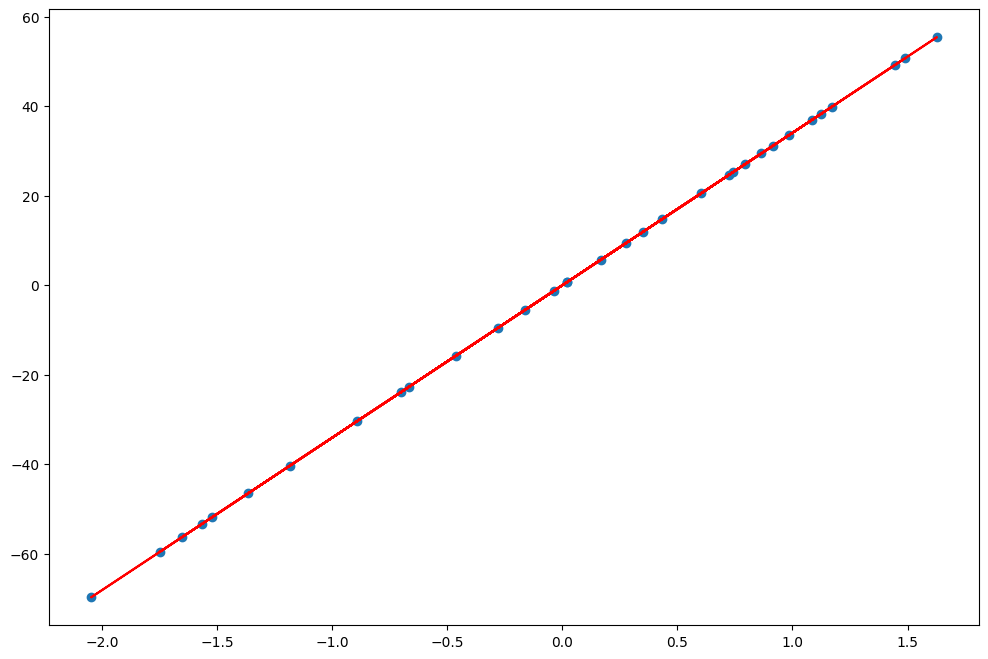

In [17]:
plt.figure(figsize=(12,8))
plt.plot(X_test,(model.coef_*X_test)+model.intercept_,'r')
plt.scatter(X_test,y_test)

#### Sklearn.SGDRegressor Results

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
model=SGDRegressor(eta0=0.1)

In [20]:
model.fit(X_train.reshape(-1,1),y_train)

SGDRegressor(eta0=0.1)

In [21]:
yhat_sklearn=model.predict(X_test.reshape(-1,1))

In [22]:
model.coef_,model.intercept_

(array([34.06960929]), array([6.92865552e-05]))

In [23]:
r2_score(y_test,yhat_sklearn)

0.9999999857088856

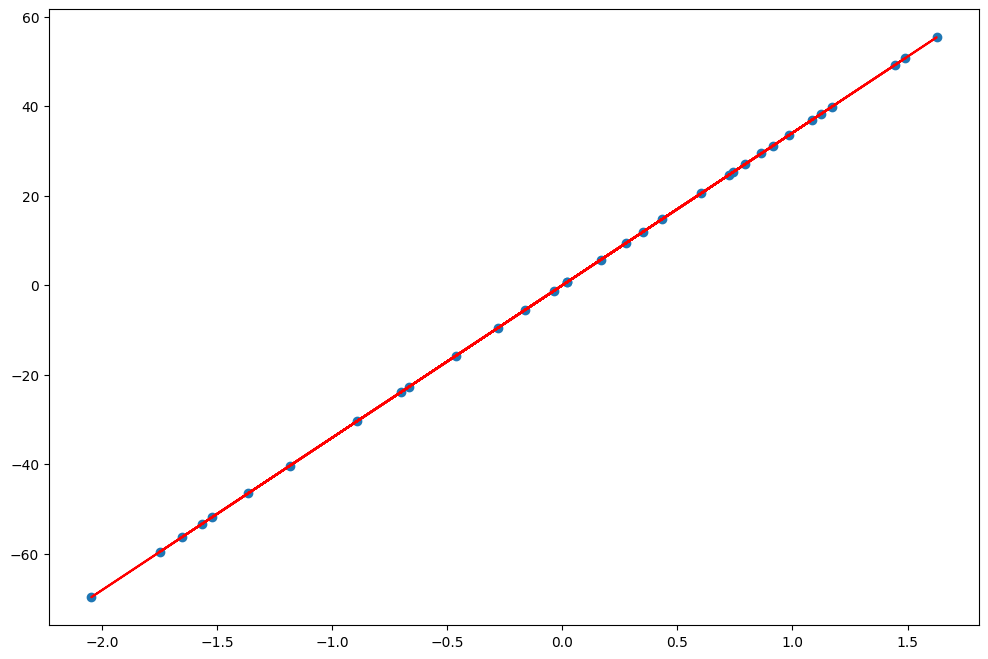

In [24]:
plt.figure(figsize=(12,8))
plt.plot(X_test,(model.coef_*X_test)+model.intercept_,'r')
plt.scatter(X_test,y_test)